# More Charts Assignment
## DSC 640
## Weeks 3 and 4
## Data Presentation and Visualization Assignment Weeks 3 and 4
## David Berberena
## 6/30/2024

# Program Start

In [2]:
# To craft the necessary charts, I will need to import my dataset, which I have chosen to be the Unemployment Rates dataset 
# from the Exercise 2.2 Datasets file folder. I have saved that file to my directory and will read it in here using 
# Pandas, which will be imported now along with Matplotlib and Squarify, the libraries I have chosen to use to output all 
# of the visualizations needed: a tree map, an area chart, a stacked area chart, and a step chart.

import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

unemployment_ratings = pd.read_csv('unemployment.csv')

# The head() function is used here to verify that the data has been loaded in correctly.

unemployment_ratings.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


## Visualization 1: Tree Map

In [3]:
# For the tree map, I will need to clean the dataset by eliminating the 'Series id' column and replace the 'Period' column 
# values with more recognizable values, as these observations stand for the months of the year. The unwanted variable will 
# be dropped using the drop() function with the axis set to 1 so the function knows to drop a column and not a row. The 
# values of the 'Period' column will be converted using the map() function on the dictionary I have created linking each 
# dataset column observation to its respective month of the year.

unemployment = unemployment_ratings.drop('Series id', axis = 1)

months_dict = {
    'M01': 'January',
    'M02': 'February',
    'M03': 'March',
    'M04': 'April',
    'M05': 'May',
    'M06': 'June',
    'M07': 'July',
    'M08': 'August',
    'M09': 'September',
    'M10': 'October',
    'M11': 'November',
    'M12': 'December'
}

unemployment['Period'] = unemployment['Period'].map(months_dict)
        
# The head() function is used here to verify that the data has been transformed correctly. I have also saved this 
# transformed dataset as a CSV file for use in the other two visualization tools. 

unemployment.head()

,Year,Period,Value
0,1948,January,3.4
1,1948,February,3.8
2,1948,March,4.0
3,1948,April,3.9
4,1948,May,3.5


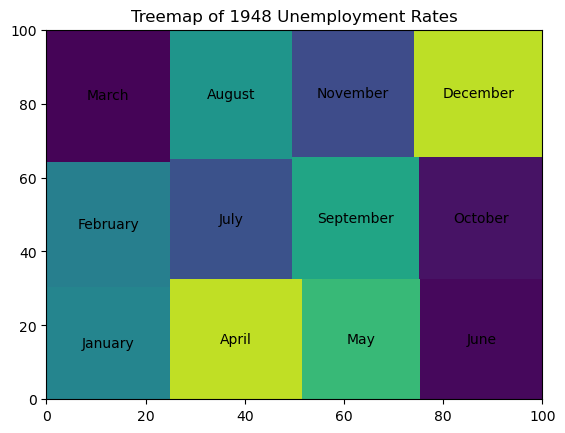

In [9]:
# Here is the construction of the tree map using Squarify's plot() function. As the dataset takes into account multiple 
# years of unemployment, I have chosen to plot only the first year listed, which is 1948. This encompasses the first twelve
# observations, so the head() function specifying 12 as the argument is used to capture that year's unemployment rates to 
# see each month's rate proportionate to each other and to the whole year.

squarify.plot(sizes = unemployment['Value'].head(12), label = unemployment['Period'].head(12))
plt.title('Treemap of 1948 Unemployment Rates')
plt.show()

## Visualization 2: Area Chart

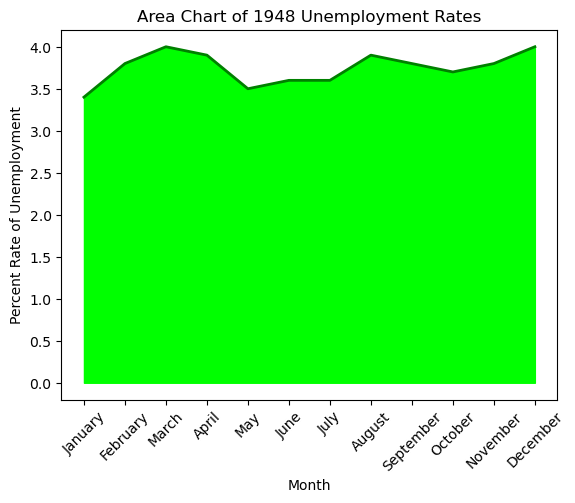

In [46]:
# Using the same year (1948) as the previous visualization, I will craft an area chart using Matplotlib's fill_between() 
# function for the shading beneath the line made by the plot() function of Matplotlib showing the unemployment rate trend 
# for that year. I added the linewidth argument to the plot() function that creates the chart so the line can be seen 
# clearly. 

plt.fill_between(unemployment['Period'].head(12), unemployment['Value'].head(12), color = 'lime')
plt.plot(unemployment['Period'].head(12), unemployment['Value'].head(12), color = 'green', linewidth = 2)

# Since I transformed the previously shorter and more ambiguous month labels to the actual month names, I added the xticks()
# function so those names would be displayed without running into one another.

plt.xlabel('Month')
plt.ylabel('Percent Rate of Unemployment')
plt.title('Area Chart of 1948 Unemployment Rates')
plt.xticks(rotation = 45)
plt.show()

## Visualization 3: Stacked Area Chart

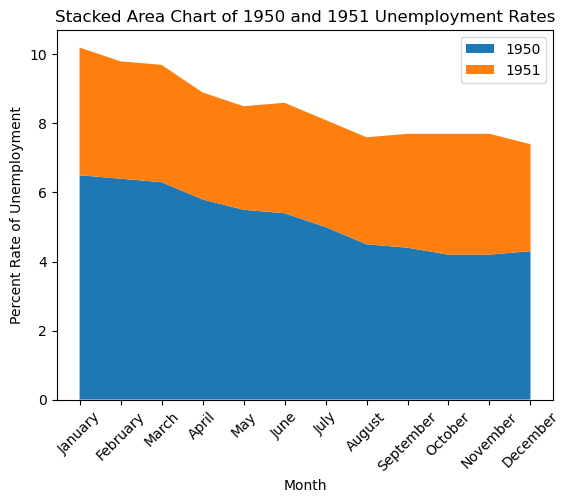

In [47]:
# For the stacked area chart, I have had to alter the original dataset heavily to visualize the desired chart. First, I 
# needed to extract the observations from two years within the dataset. This has been with two for loops which turn those 
# subsets of data into their own DataFrames. Then I vertically concatenated the DataFrames using the pd.concat() function.

years = unemployment['Year'].unique()

for year in years[2:3]:
    unemployment_year_1950 = unemployment[unemployment['Year'] == year]
    pd.DataFrame(unemployment_year_1950)
    
for year in years[3:4]:
    unemployment_year_1951 = unemployment[unemployment['Year'] == year]
    pd.DataFrame(unemployment_year_1951)

rates_1950_1951 = pd.concat([unemployment_year_1950, unemployment_year_1951])

# Now that the two years' worth of dat has been put into a singular DataFrame, I need to make sure that the observations are
# ordered correctly by year and month. Pandas has the pd.Categorical() function to help with ordering the months correctly 
# after creating a list with the months in the correct order. I used sort_values() afterwards to sort the dataset by both 
# year and month. 

months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
                   'November', 'December']

rates_1950_1951['Period'] = pd.Categorical(rates_1950_1951['Period'], categories = months_in_order, ordered = True)

rates_1950_1951 = rates_1950_1951.sort_values(by = ['Year', 'Period'])

# After much headache and research, I finally managed to figure out that I needed to pivot the dataset to get the desired 
# information to appear correctly on the visualization. Here I employed the pivot() function to specify how the DataFrame 
# needs to be laid out for the plotting of the stacked area chart to work correctly using the index, columns, and values 
# arguments. I have named variables to plug into the construction of the chart, with the rates variable needing to have the
# pivoted values transposed so all of the unemployment rates would be captured.

ordered_1950_1951_rates = rates_1950_1951.pivot(index = 'Period', columns = 'Year', values = 'Value')

months = ordered_1950_1951_rates.index

rates = ordered_1950_1951_rates.values.T

years = ordered_1950_1951_rates.columns
    
# Matplotlib's stackplot() function is the choice I have made to create the stacked area chart as it is made for this task
# I have added a legend for easy identification of which year is which color area.

plt.stackplot(months, rates, labels = years)
plt.xlabel('Month')
plt.ylabel('Percent Rate of Unemployment')
plt.title('Stacked Area Chart of 1950 and 1951 Unemployment Rates')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)
plt.show()


## Visualization 4: Step Chart

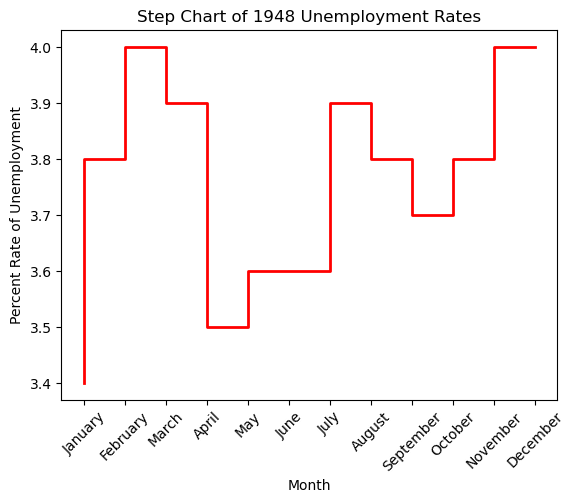

In [48]:
# A step chart is simply a line chart that connects observations by horizontal and vertical lines that resemble steps in 
# their shape. Matplotlib has a step() function which easily allows for this chart to be realized. I will be plotting the 
# 1948 unemployment rates once again like in the first two visualizations.

plt.step(unemployment['Period'].head(12), unemployment['Value'].head(12), color = 'red', linewidth = 2)

plt.title('Step Chart of 1948 Unemployment Rates')
plt.xlabel('Month')
plt.ylabel('Percent Rate of Unemployment')
plt.xticks(rotation = 45)
plt.show()